参考以下超边图，设计量子随机游走
 ![超边图](./hypercube.png)

 该图一共16个点，因此需要四个量子比特表示点的标号。
 对于标号为 $x$ 的任意一点，可以分解为以下四种运动：
 - 在x轴上的移动，$x\rightarrow x \oplus 1$
 - 在y轴上的移动，$x\rightarrow x \oplus 2$
 - 在z轴上的移动，$x\rightarrow x \oplus 4$
 - 在内外立方体之间移动，$x\rightarrow x \oplus 8$

因此硬币空间需要四种不同状态对应不同运动， 即需要两个量子比特。
- $\ket{00}$ 对应x轴运动
- $\ket{01}$ 对应y轴运动
- $\ket{10}$ 对应z轴运动
- $\ket{11}$ 对应在内外立方体之间移动

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
walk_space = QuantumRegister(4, 'node')
c_reg = ClassicalRegister(4,'measure')
coin_qubit = QuantumRegister(2, 'coin')

qrw_qc = QuantumCircuit(walk_space, coin_qubit, c_reg)

# initial coin space
qrw_qc.h(coin_qubit)

# x move
qrw_qc.x(coin_qubit)
qrw_qc.mcx(coin_qubit,walk_space[0])
qrw_qc.x(coin_qubit)

# y move
qrw_qc.x(coin_qubit[1])
qrw_qc.mcx(coin_qubit,walk_space[1])
qrw_qc.x(coin_qubit[1])

# z move
qrw_qc.x(coin_qubit[0])
qrw_qc.mcx(coin_qubit,walk_space[2])
qrw_qc.x(coin_qubit[0])

# cube move
qrw_qc.mcx(coin_qubit,walk_space[3])


# Measurement
for i in range(4):
    qrw_qc.measure(walk_space[i], c_reg[i])

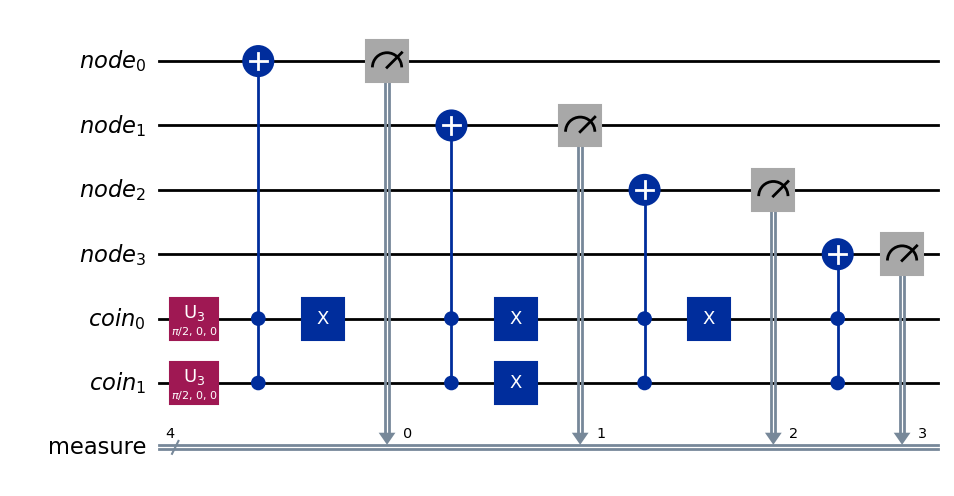

In [2]:
qrw_qc = transpile(qrw_qc, optimization_level=1)
qrw_qc.draw('mpl')

In [3]:
from qiskit.primitives import Sampler
result = Sampler().run(qrw_qc).result()
result.quasi_dists

[{1: 0.25, 2: 0.25, 4: 0.25, 8: 0.25}]